# MMAI1001 Kecerdasan Artifisial (Tugas 1 Maze) | KELOMPOK 10

**Kelompok 10**


1.   Dwi Ahmad Dzulhijjah - 2408207010012
2.   Tiffany Rizkika - 2408207010027
3. Ismail - 2408207010019



## Tentang Tugas

**Deskripsi** <br>
> Anda tahu permainan maze? Kalau melihat gambar berikut ini pasti tahu. Dalam permainan maze ini makhluk yang digambarkan dengan bulatan wajah Mr. Groovy harus mencari jalan ke luar dari petak maze yang diberikan.

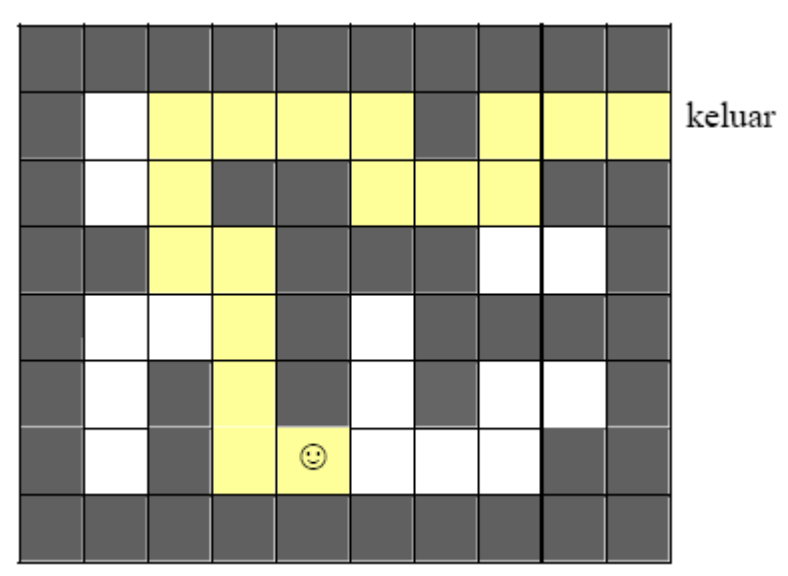

>Jalan keluar yang harus dilaluinya adalah kota-kotak yang berwarna kuning tersebut. Masalahnya karena bisa terdapat beberapa cara untuk mencapai jalan keluar maka di sini Anda harus menemukan jumlah kotak yang paling sedikit dalam lintasan, yang menyatakan juga jumlah langkah terpendek untuk mencapai bagian luar. Dalam hal contoh maze di atas yang paling sedikit adalah 17 kotak/langkah yaitu yang berwana kuning tersebut.

>Diberikan maze yang berukuran N × M, dengan posisi awal Mr. Groovy pada (A, B), tentukan jumlah langkah minimum yang dibutuhkan untuk mencapai ke luar. Anda diminta mengimplementasikan code Python untuk Tugas ini. Gunakan algoritma pencarian Breath First Search (BFS) atau algoritma pencarian Deep First Search (DSF) untuk menyelesaikan masalah ini. Input Maze diperoleh melalui membaca file maze.txt. Tugas ini dikerjakan secara kelompok yang terdiri dari 3 (tiga) orang mahasiswa atau lebih. Tugas ini dikumpulkan paling lambat Sabtu tanggal 05 Oktober 2024 melaui e-learning. File-file yang disubmit meliputi minimal file code python, file readme.doc (penjelasan tentang detail implementasi coding serta cara runningnya). Semua file yang perlu disubmit harus dikompresi dalam folder dengan format Kelompokxx.rar dimana xx adalah nomor kelompok.

**Format Masukan** <br>
> Baris pertama berisi dua buah bilangan bulat N dan M. N baris berikutnya masing-masing berisi M buah bilangan -1 yang menyatakan dinding yang tidak dapat ditembus, atau 0 yang menyatakan ruang yang dapat dilalui. Baris berikutnya berisi dua buah bilangan bulat A dan B. Dijamin petak (A, B) adalah ruangan. Maze mungkin tidak punyajalan keluar atau dapat memiliki satu atau lebih jalan keluar.

**Format Keluaran**
> Sebuah baris berisi sebuah bilangan bulat positif yaitu langkah minimum untuk mencapai ke luar atau -1 jika tidak ada jalan keluar

**1. Contoh Masukan (File maze.txt)**<br>
8 10<br>
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1<br>
-1 0 0 0 0 0 -1 0 0 0<br>
-1 0 0 -1 -1 0 0 0 -1 -1<br>
-1 -1 0 0 -1 -1 -1 0 0 -1<br>
-1 0 0 0 -1 0 -1 -1 -1 -1<br>
-1 0 -1 0 -1 0 -1 0 0 -1<br>
-1 0 -1 0 0 0 0 0 -1 -1<br>
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1<br>
7 5<br>
**Contoh Keluaran**<br>
17<br>
**2.Contoh Masukan (File maze.txt)**<br>
8 10<br>
-1 0 -1 -1 -1 -1 -1 -1 -1 -1<br>
-1 0 0 0 0 0 -1 0 0 0<br>
-1 0 0 -1 -1 0 0 0 -1 -1<br>
-1 -1 0 0 -1 -1 -1 0 0 -1<br>
-1 0 0 0 -1 0 -1 -1 -1 -1<br>
-1 0 -1 0 -1 0 -1 0 0 -1<br>
-1 0 -1 0 0 0 0 0 -1 -1<br>
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1<br>
7 5<br>
**Contoh Keluaran**<br>
10<br>
**3.Contoh Masukan (File maze.txt)**<br>
8 10<br>
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1<br>
-1 0 0 0 0 0 -1 0 0 -1<br>
-1 0 0 -1 -1 0 0 0 -1 -1<br>
-1 -1 0 0 -1 -1 -1 0 0 -1<br>
-1 0 0 0 -1 0 -1 -1 -1 -1<br>
-1 0 -1 0 -1 0 -1 0 0 -1<br>
-1 0 -1 0 0 0 0 0 -1 -1<br>
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1<br>
7 5<br>
Contoh Keluaran<br>
-1<br>

**Batasan ukuran**
* 3 ≤ N, M ≤ 12
* 1 ≤ A ≤ N
* 1 ≤ B ≤ M

## Jawaban Tugas

### Algoritma BFS

In [6]:
def bfs(maze, start, N, M):
    # Directions for moving in the maze: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    queue = deque([(start[0], start[1], 0)])  # (row, col, steps)
    visited = set()
    visited.add((start[0], start[1]))

    while queue:
        r, c, steps = queue.popleft()

        # Check all possible directions
        for dr, dc in directions:
            nr, nc = r + dr, c + dc

            # Check if we have reached an exit (boundary of the maze)
            if nr < 0 or nr >= N or nc < 0 or nc >= M:
                continue  # Skip if the next cell is out of bounds

            # Check for a valid exit path (open boundary) without counting the extra step
            if (nr == 0 or nr == N-1 or nc == 0 or nc == M-1) and maze[nr][nc] == 0:
                return steps  # Adjusted to stop counting after reaching the boundary

            # Ensure the new position is walkable and not visited
            if (nr, nc) not in visited and maze[nr][nc] == 0:
                visited.add((nr, nc))
                queue.append((nr, nc, steps + 1))

    return -1  # No exit found

### Simulasi 2

In [9]:
def simulasi_2():
    N, M = 8, 10  # Dimensions of the maze
    maze = [
        [-1,  0, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0,  0,  0,  0,  0, -1,  0,  0,  0],
        [-1,  0,  0, -1, -1,  0,  0,  0, -1, -1],
        [-1, -1,  0,  0, -1, -1, -1,  0,  0, -1],
        [-1,  0,  0,  0, -1,  0, -1, -1, -1, -1],
        [-1,  0, -1,  0, -1,  0, -1,  0,  0, -1],
        [-1,  0, -1,  0,  0,  0,  0,  0, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
    ]
    start = (7, 5)  # Start position (0-based)

    result = bfs(maze, start, N, M)
    return result

# Run the corrected simulation
simulasi_2()

10

### Simulasi 3

In [11]:
def simulasi_3():
    N, M = 8, 10  # Dimensions of the maze
    maze = [
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0,  0,  0,  0,  0, -1,  0,  0, -1],
        [-1,  0,  0, -1, -1,  0,  0,  0, -1, -1],
        [-1, -1,  0,  0, -1, -1, -1,  0,  0, -1],
        [-1,  0,  0,  0, -1,  0, -1, -1, -1, -1],
        [-1,  0, -1,  0, -1,  0, -1,  0,  0, -1],
        [-1,  0, -1,  0,  0,  0,  0,  0, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
    ]
    start = (7, 5)  # Start position (0-based)
    result = bfs(maze, start, N, M)
    return result

simulasi_3()

-1

## Analisis Program

### 1. **Tujuan Kode**
Kode ini bertujuan untuk menemukan jalur terpendek dari titik awal tertentu di dalam maze menuju ke tepi luar maze menggunakan **algoritma Breadth-First Search (BFS)**. Algoritma ini mengeksplorasi setiap kemungkinan jalur secara sistematis dari satu titik ke titik lainnya hingga menemukan jalur terpendek ke titik keluar (batas maze yang bisa dilalui).

### 2. **Struktur Kode**
Kode terdiri dari dua fungsi utama:
1. **`bfs(maze, start, N, M)`**: Ini adalah fungsi inti yang mengimplementasikan algoritma BFS untuk mengeksplorasi maze.
2. **`simulasi_1()`**: Fungsi ini digunakan untuk menjalankan simulasi dengan input maze yang sudah didefinisikan.

### 3. **Penjelasan Detail Setiap Bagian Kode**

#### a. **Fungsi BFS**
```python
def bfs(maze, start, N, M):
```
- Fungsi ini menerima empat argumen:
  - **maze**: Matriks 2D yang merepresentasikan maze dengan dinding (-1) dan ruang yang bisa dilalui (0).
  - **start**: Posisi awal dalam maze (baris, kolom).
  - **N**: Jumlah baris dalam maze.
  - **M**: Jumlah kolom dalam maze.

#### b. **Inisialisasi Antrian dan Set Kunjungan**
```python
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    queue = deque([(start[0], start[1], 0)])  # (baris, kolom, langkah)
    visited = set()
    visited.add((start[0], start[1]))
```
- **directions**: Array yang mendefinisikan empat arah pergerakan (atas, bawah, kiri, kanan) yang memungkinkan di dalam maze.
- **queue**: Antrian FIFO yang menyimpan tuple berisi koordinat (baris, kolom) dan jumlah langkah yang sudah dilalui dari titik awal.
- **visited**: Set yang menyimpan semua posisi yang sudah dikunjungi untuk mencegah eksplorasi ulang.

#### c. **Perulangan BFS**
```python
    while queue:
        r, c, steps = queue.popleft()
```
- **while queue**: Perulangan ini akan terus berjalan selama masih ada posisi yang perlu dieksplorasi dalam antrian.
- **popleft()**: Mengambil posisi pertama dari antrian untuk dieksplorasi.

#### d. **Memeriksa Semua Arah**
```python
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
```
- **for dr, dc in directions**: Untuk setiap arah (atas, bawah, kiri, kanan), kode akan menghitung posisi baru (nr, nc) yang merupakan tetangga dari posisi saat ini.

#### e. **Memeriksa Batas Maze**
```python
            if nr < 0 or nr >= N or nc < 0 or nc >= M:
                continue  # Skip if the next cell is out of bounds
```
- Jika tetangga berada di luar batas maze (misalnya baris atau kolom negatif atau lebih dari ukuran maze), tetangga tersebut diabaikan dengan **continue**.

#### f. **Memeriksa Apakah Posisi adalah Jalan Keluar**
```python
            if (nr == 0 or nr == N-1 or nc == 0 or nc == M-1) and maze[nr][nc] == 0:
                return steps  # Adjusted to stop counting after reaching the boundary
```
- Jika posisi tetangga (nr, nc) berada di batas maze dan merupakan ruang yang bisa dilalui (`maze[nr][nc] == 0`), maka langkah terpendek ditemukan, dan jumlah langkah dikembalikan dengan **return steps**.

#### g. **Menambahkan Posisi Baru ke Antrian**
```python
            if (nr, nc) not in visited and maze[nr][nc] == 0:
                visited.add((nr, nc))
                queue.append((nr, nc, steps + 1))
```
- Jika tetangga (nr, nc) bisa dilalui dan belum pernah dikunjungi, tambahkan tetangga tersebut ke **queue** dan **visited** untuk dieksplorasi pada iterasi berikutnya.

#### h. **Mengembalikan Nilai Jika Tidak Ada Jalan Keluar**
```python
    return -1  # No exit found
```
- Jika perulangan selesai dan tidak ditemukan jalan keluar, fungsi akan mengembalikan **-1**.

#### i. **Simulasi 1**
```python
def simulasi_1():
    N, M = 8, 10  # Dimensions of the maze
    maze = [
        [-1,  -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0,  0,  0,  0,  0, -1,  0,  0,  0],
        [-1,  0,  0, -1, -1,  0,  0,  0, -1, -1],
        [-1, -1,  0,  0, -1, -1, -1,  0,  0, -1],
        [-1,  0,  0,  0, -1,  0, -1, -1, -1, -1],
        [-1,  0, -1,  0, -1,  0, -1,  0,  0, -1],
        [-1,  0, -1,  0,  0,  0,  0,  0, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
    ]
    start = (7, 5)  # Start position (0-based)

    result = bfs(maze, start, N, M)
    return result
```
- **simulasi_1()** menjalankan BFS pada maze yang sudah didefinisikan dan mengembalikan jumlah langkah terpendek dari posisi awal (7, 5) ke batas luar maze.

### 4. **Analisis Algoritma**

- **Keuntungan BFS**: Algoritma ini sangat sesuai untuk masalah jalur terpendek di graf tidak berbobot seperti maze. BFS mengeksplorasi semua kemungkinan jalur secara level-by-level, sehingga menjamin bahwa jalur pertama yang ditemukan adalah jalur terpendek.

- **Kerugian BFS**: Jika maze memiliki ukuran besar, BFS mungkin membutuhkan banyak memori karena setiap simpul yang bisa dijangkau harus dimasukkan ke dalam antrian dan disimpan dalam set visited. Namun, untuk ukuran maze pada tugas ini (8x10), BFS berjalan dengan sangat efisien.

- **Kompleksitas Waktu**: Kompleksitas waktu BFS adalah **O(N*M)**, di mana N adalah jumlah baris, dan M adalah jumlah kolom. Hal ini disebabkan BFS harus mengeksplorasi setiap sel dalam maze.

- **Kompleksitas Ruang**: BFS menggunakan ruang tambahan untuk menyimpan antrian dan set **visited**, sehingga kompleksitas ruangnya juga **O(N*M)**.

### 5. **Kesimpulan**
Implementasi BFS pada masalah maze ini berjalan dengan baik untuk menemukan jalur terpendek dari posisi awal ke batas luar. BFS secara sistematis mengeksplorasi semua jalur yang mungkin dan menjamin bahwa jalur pertama yang ditemukan adalah jalur terpendek. Algoritma ini sangat cocok untuk ukuran maze yang digunakan dalam simulasi ini.